In [14]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import numpy as np

torch.manual_seed(1)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 토이 데이터 생성 

In [194]:
x1 = torch.arange(1,101) + torch.randn(100)
x2 = torch.cat([torch.zeros(50)+torch.abs(torch.randn(50)),torch.ones(50)-torch.abs(torch.randn(50))])
x = torch.cat([x1.unsqueeze(1),x2.unsqueeze(1)],1)
x = Variable(x)

y = torch.cat([torch.zeros(50),torch.ones(50)])
y = Variable(y).unsqueeze(1)

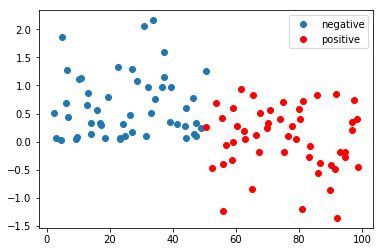

In [195]:
fig, ax = plt.subplots()
ax.plot(x[:,0].data.numpy()[:50],x[:,1].data.numpy()[:50],'o',label='negative')
ax.plot(x[:,0].data.numpy()[50:],x[:,1].data.numpy()[50:],'ro',label='positive')
ax.legend()
plt.show()

### 모델링 

In [208]:
model = nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

for param in model.parameters():
    print(param)

Parameter containing:
 0.1470  0.1960
[torch.FloatTensor of size 1x2]

Parameter containing:
-0.2379
[torch.FloatTensor of size 1]



### 트레이닝 

In [209]:
LEARNING_RATE=0.001
STEP = 30

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LEARNING_RATE)

$$loss(o, t) = - 1/n \sum_i (t[i] * log(o[i]) + (1 - t[i]) * log(1 - o[i]))$$

In [210]:
for step in range(STEP):
    model.zero_grad()
    pred = model(x)
    loss = loss_function(pred,y)
    
    print("[%02d/%d] loss : %.3f" % (step,STEP,loss.data[0]))

    # gradient descent
    loss.backward()
    optimizer.step()

[00/30] loss : 1.893
[01/30] loss : 1.738
[02/30] loss : 1.585
[03/30] loss : 1.435
[04/30] loss : 1.289
[05/30] loss : 1.149
[06/30] loss : 1.015
[07/30] loss : 0.893
[08/30] loss : 0.786
[09/30] loss : 0.700
[10/30] loss : 0.640
[11/30] loss : 0.607
[12/30] loss : 0.593
[13/30] loss : 0.589
[14/30] loss : 0.588
[15/30] loss : 0.588
[16/30] loss : 0.588
[17/30] loss : 0.588
[18/30] loss : 0.587
[19/30] loss : 0.587
[20/30] loss : 0.587
[21/30] loss : 0.587
[22/30] loss : 0.587
[23/30] loss : 0.587
[24/30] loss : 0.587
[25/30] loss : 0.587
[26/30] loss : 0.587
[27/30] loss : 0.587
[28/30] loss : 0.587
[29/30] loss : 0.587


### Exercise 3.1 : Breast Cancer Wisconsin (Diagnostic) Data Set from Kaggle 

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data

In [16]:
dataframe = pd.read_csv('../data/Diagnostic_data.csv',delimiter=',')
print(dataframe.shape)
dataframe[:3]

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [286]:
feature_names= list(dataframe.columns)[1:-1] # exclude id, Unnamed:32

# https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
selected_features=['texture_mean',
                             'area_mean',
                             'smoothness_mean',
                             'concavity_mean',
                             'symmetry_mean',
                             'fractal_dimension_mean',
                             'texture_se',
                             'area_se',
                             'smoothness_se',
                             'concavity_se',
                             'symmetry_se',
                             'fractal_dimension_se',
                             'smoothness_worst',
                             'concavity_worst',
                             'symmetry_worst',
                             'fractal_dimension_worst']

num_data = dataframe.shape[0]

In [287]:
X,y = [],[]

for i in range(num_data):
    row=[]
    for feature in feature_names:
        if feature=="diagnosis":
            y.append(dataframe[feature][i])
        elif feature in selected_features:
            row.append(dataframe[feature][i])
    X.append(row)

#### Handling discrete Variable

In [288]:
y = list(map(lambda e:1 if e=="M" else 0,y)) # symbolize with integer

#### to tensor and wrap autograd.Variable

In [289]:
X = Variable(torch.Tensor(X)) # load from list
y = Variable(torch.Tensor(y))

#### 모델링

In [414]:
class LogisticRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LogisticRegression,self).__init__()
        
        self.linear = nn.Linear(input_size,output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,inputs):
        return self.sigmoid(self.linear(inputs)) # F.sigmoid(self.linear(inputs))

#### 트레이닝 

In [450]:
LR = 0.00001
STEP = 10
model = LogisticRegression(X.size(1),1)
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LR)

for param in model.parameters():
    print(param)

Parameter containing:

Columns 0 to 9 
-0.1572 -0.0211  0.1897 -0.0484  0.2066 -0.1292 -0.0216  0.0122 -0.1755  0.1482

Columns 10 to 15 
-0.0071 -0.2485  0.1017 -0.0991 -0.1339  0.0980
[torch.FloatTensor of size 1x16]

Parameter containing:
1.00000e-02 *
  6.3106
[torch.FloatTensor of size 1]



In [451]:
for step in range(STEP):
    model.zero_grad()
    pred = model(X)
    loss = loss_function(pred.squeeze(1),y)
    
    print("[%02d/%d] loss : %.3f" % (step,STEP,loss.data[0]))

    # gradient descent
    loss.backward()
    optimizer.step()

[00/10] loss : 8.114
[01/10] loss : 7.534
[02/10] loss : 6.658
[03/10] loss : 5.548
[04/10] loss : 4.268
[05/10] loss : 2.938
[06/10] loss : 1.637
[07/10] loss : 0.640
[08/10] loss : 0.474
[09/10] loss : 0.473


### TODO 

* 데이터 EDA, feature selection에 대해 공부해보기
* Data loader 클래스 사용해보기
* 멀티 클래스 데이터셋 적용해보기 (one vs all)

### NEXT 

* "Non-Convex"한 loss를 어떻게 대처할까?
* 학습이 잘 된건지 어떻게 판단할까? loss값이 줄어들기만 하면 무조건 좋을까?